---
title: "Neonatal Mortality VS Economy Report"
format:
  html:
    embed-resources: true
    author: "Rahul Mahesh Mungekar"
    code-fold: true
    code-tools: true
    code-overflow: wrap
    background color: " Grey "
    number-sections: true
    theme: cosmo
    echo: true

execute:
  warning: false
  message: false
  echo: true
---

In [1]:
#| output: false
!pip install polars geopandas matplotlib

**Introduction**

The Neonatal Mortality Rate is a key factor in analysing any country's healthcare infrastructure based on its economy.   Unicef, with the help of this report, can establish a strong relationship between how a country's Population, GDP, and Healthcare structure are overall affecting the country's Neonatal mortality rate. The report also highlights various factors like time, Geography, Population and Healthcare structure to analyse how a Neonatal Mortality rate is affected by such factors with the help of 4 different Plots, mainly a World Map, Bar Chart, Scatter Plot with Regression line and Line chart.

**1) World Map**

In [2]:
#| output: false

import polars as pl

# Loading dataset
df_indicator = pl.read_csv("/content/unicef_indicator_2.csv")


print(df_indicator.columns)


['country', 'alpha_2_code', 'alpha_3_code', 'numeric_code', 'indicator', 'time_period', 'obs_value', 'sex', 'unit_multiplier', 'unit_of_measure', 'observation_status', 'observation_confidentaility', 'time_period_activity_related_to_when_the_data_are_collected', 'current_age']


In [3]:
#| output: false

import polars as pl

# Loading dataset
df_indicator = pl.read_csv("/content/unicef_indicator_2.csv")

# Filter for Neonatal Mortality Rate
df_neonatal = df_indicator.filter(
    pl.col("indicator") == "Neonatal mortality rate"
)

# Group by and agg as per lecture slide for Country and SUM 'Obs Value', here sum is done as my tableau map represents sum of Neonatal Mortality rate
df_sum = (
    df_neonatal.group_by("country")
    .agg(pl.col("obs_value").sum().alias("Neonatal Mortality Rate"))
)

# Converting Pandas DataFrame for merging with GeoPandas
df_sum_pd = df_sum.to_pandas()


In [4]:
#| output: false

# Download and unzip world shapefile
!wget -O world_boundaries.zip "https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp"
!unzip world_boundaries.zip -d /content/world_boundaries

import geopandas as gpd

# Loading shapefile
world = gpd.read_file('/content/world_boundaries/world-administrative-boundaries.shp')



--2025-04-27 10:22:15--  https://public.opendatasoft.com/api/explore/v2.1/catalog/datasets/world-administrative-boundaries/exports/shp
Resolving public.opendatasoft.com (public.opendatasoft.com)... 18.200.140.238, 52.211.64.165
Connecting to public.opendatasoft.com (public.opendatasoft.com)|18.200.140.238|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘world_boundaries.zip’

world_boundaries.zi     [    <=>             ]   1.91M  3.02MB/s    in 0.6s    

2025-04-27 10:22:16 (3.02 MB/s) - ‘world_boundaries.zip’ saved [2006162]

Archive:  world_boundaries.zip
  inflating: /content/world_boundaries/world-administrative-boundaries.prj  
  inflating: /content/world_boundaries/world-administrative-boundaries.cpg  
  inflating: /content/world_boundaries/world-administrative-boundaries.dbf  
  inflating: /content/world_boundaries/world-administrative-boundaries.shp  
  inflating: /content/world_boundaries/world-administrative-

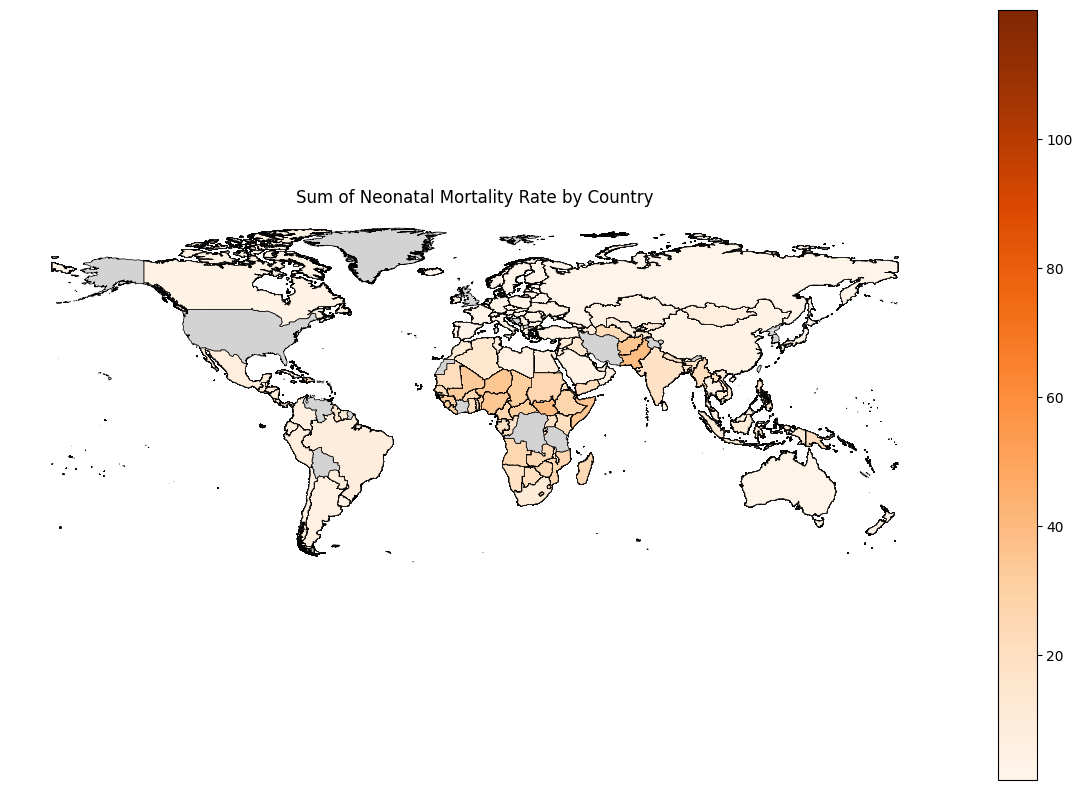

In [5]:
import geopandas as gpd

# Loading shapefile for world boundaries
shape_world = gpd.read_file('/content/world_boundaries/world-administrative-boundaries.shp')
df_indicator = pl.read_csv("/content/unicef_indicator_2.csv")
# Merge data with GeoDataFrame
map_mortality = (
    shape_world
    .merge(df_indicator.to_pandas(), left_on="name", right_on="country", how="outer")
)

import matplotlib.pyplot as plt

# Ploting map
fig, ax = plt.subplots(1, 1,figsize=(15, 10) )

map_mortality.plot(column='obs_value',
                   ax=ax,
                   legend=True,
                   cmap='Oranges',
                   missing_kwds={"color": "lightgrey"},
                   edgecolor='black',
                   linewidth=0.5)

ax.set_title('Sum of Neonatal Mortality Rate by Country')
ax.axis('off')

plt.show()


**Global observation for Neonatal Mortality-**

The Map illustrates the Neonatal mortality rates globally. The countries with dark orange shades have higher neonatal deaths as compared to the light orange ones. The highest dark shades of oranges can be seen from Africa and South Asian regions. Parts of Europe,  North America and East Asia have relatively lower neonatal mortality rates as these countries are economically strong due to higher GDP with good healthcare infrastructure. The Missing regions are marked in grey shade.

**2) Bar Plot**

In [6]:
#| output: false

import polars as pl

# Load Data
df_indicator = pl.read_csv("/content/unicef_indicator_2.csv")

# Filter for Neonatal Mortality Rate
df_neonatal = df_indicator.filter(pl.col("indicator") == "Neonatal mortality rate")

# Group by Country and SUM 'obs_value'
df_sum = (
    df_neonatal.group_by("country")
    .agg(pl.col("obs_value").sum().alias("Neonatal_Mortality_Rate"))
)

# Convert to pandas
df_sum_pd = df_sum.to_pandas()

# Load data for GDP
df_GDP = pl.read_csv("/content/unicef_metadata (1).csv",infer_schema_length=10000)
# Convert GDP to pandas
df_GDP_pd = df_GDP.to_pandas()

# Merge on country column
df_merged = df_sum_pd.merge(df_GDP_pd, left_on="country", right_on="country", how="left")

# merged data with GDP
df_merged[['country', 'Neonatal_Mortality_Rate', 'GDP per capita (constant 2015 US$)']].head()

# Add a new column for original order index
df_merged['order'] = df_merged.index





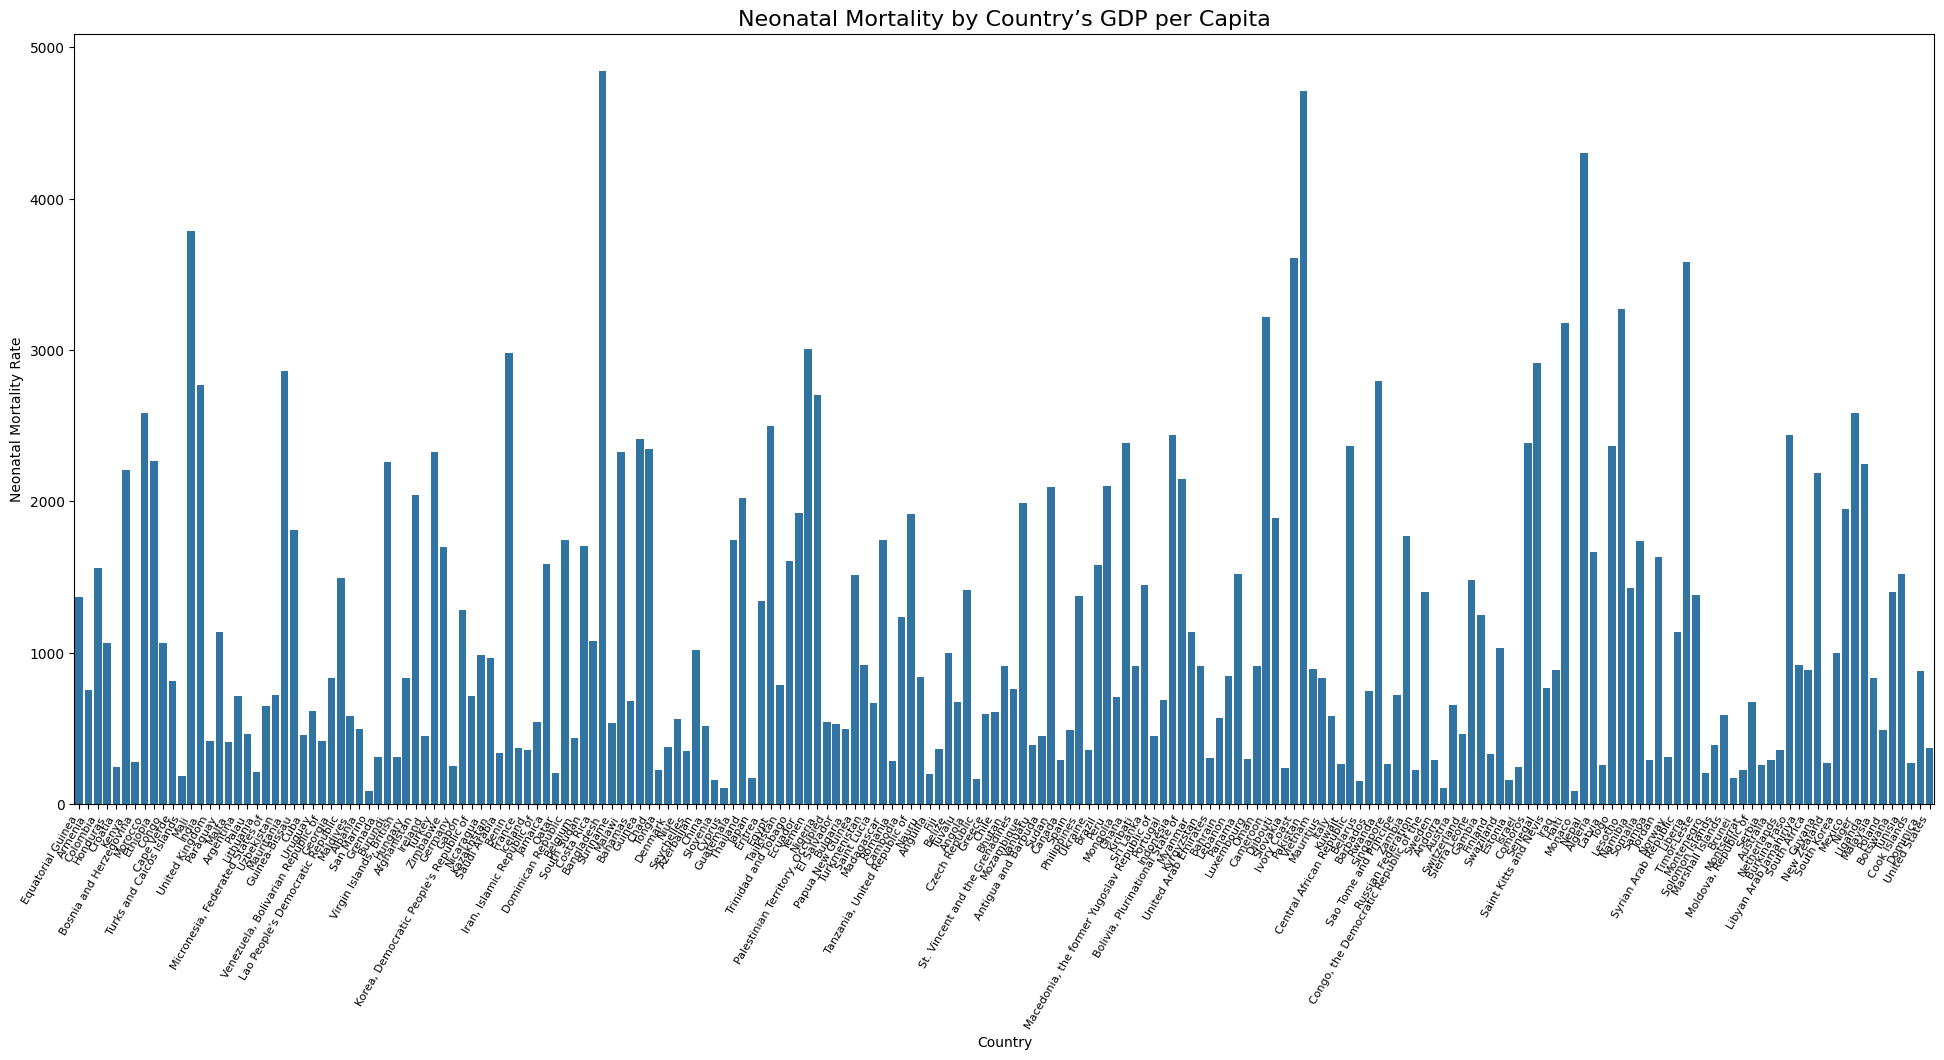

In [7]:
import seaborn as sns
# Add a new column for original order index
df_merged['order'] = df_merged.index


plt.figure(figsize=(24, 10))
#bar plot
sns.barplot(x='country', y='Neonatal_Mortality_Rate', data=df_merged)

plt.xticks(rotation=60, ha='right', fontsize=8)
plt.title('Neonatal Mortality by Country’s GDP per Capita', fontsize=16)
plt.ylabel('Neonatal Mortality Rate')
plt.xlabel('Country')

plt.show()

**What we can observe?**

The Bar chart shows the relationship between the GDP of various countries and the Neonatal Mortality rate. The countries with the lowest GDP have higher neonatal Mortality rates, as shown in the diagram. The highest GDP countries have relatively lower Neonatal Mortality. This trend shows how economic strength is related to reducing Neonatal deaths every year.


**3) Scatter Plot**

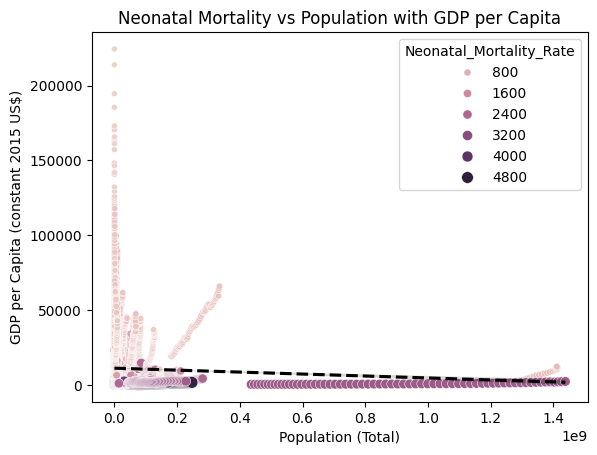

In [8]:
#3)Scatter Plot

import polars as pl

# Load data for mortality
df_indicator = pl.read_csv("/content/unicef_indicator_2.csv")
df_metadata = pl.read_csv("/content/unicef_metadata (1).csv",infer_schema_length=10000)

# Filter for Neonatal Mortality Rate
df_neonatal = df_indicator.filter(pl.col("indicator") == "Neonatal mortality rate")

# Group by agg as per the lecture for country and sum 'obs_value'
df_sum = (
    df_neonatal.group_by("country")
    .agg(pl.col("obs_value").sum().alias("Neonatal_Mortality_Rate"))
)

# Convert to pandas
df_sum_pd = df_sum.to_pandas()
df_metadata_pd = df_metadata.to_pandas()

df_merged = df_sum_pd.merge(df_metadata_pd, on="country", how="left")
import matplotlib.pyplot as plt
import seaborn as sns


# Scatterplot with bubble which represents Neonatal Mortality Rate
sns.scatterplot(data=df_merged,
                x='Population, total', y='GDP per capita (constant 2015 US$)',size='Neonatal_Mortality_Rate', hue='Neonatal_Mortality_Rate')

# Add Linear Regression Line (Fit on population vs GDP)
sns.regplot(data=df_merged,
            x='Population, total', y='GDP per capita (constant 2015 US$)',scatter=False, color='black',line_kws={ "linestyle": "--"})

# Scatterplot
plt.title('Neonatal Mortality vs Population with GDP per Capita')
plt.xlabel('Population (Total)')
plt.ylabel('GDP per Capita (constant 2015 US$)')



plt.show()

**What we can Learn from this chart?**

The Scatter plot represents the population size as compared to the Neonatal Mortality rate along with the Country's GDP. Here, a pattern can be observed where densely populated nations often tend to have lower GDP, which leads to poor healthcare infrastructure, thereby having a higher neonatal Mortality rate. This relationship proves that population cannot be the lone factor for higher Neonatal Mortality rates, but countries' GDP also plays a significant role in lowering Neonatal Mortality rates.


**4) Line Chart**

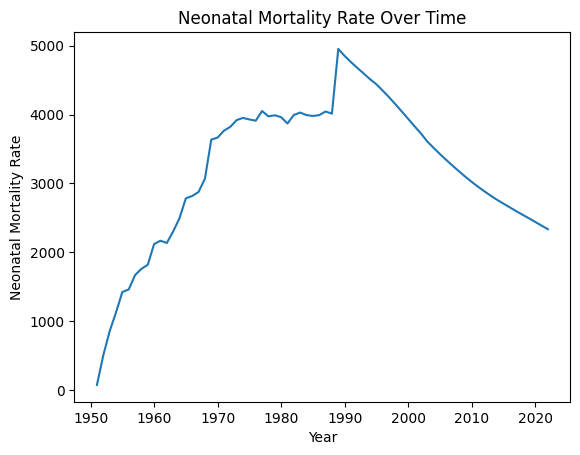

In [9]:
#4)Line chart
import polars as pl

# Load data from files
df_indicator = pl.read_csv("/content/unicef_indicator_2.csv")
df_metadata = pl.read_csv("/content/unicef_metadata (1).csv",infer_schema_length=10000)

# Filter for Neonatal Mortality Rate
df_neonatal = df_indicator.filter(pl.col("indicator") == "Neonatal mortality rate")

# Group by and agg function as per lecture for Year and Sum 'obs_value'
df_timeperiod = (
    df_neonatal.group_by("time_period")
    .agg(pl.col("obs_value").sum().alias("Neonatal_Mortality_Rate"))
)

# Convert to pandas for plotting
df_timeperiod_pd = df_timeperiod.to_pandas()

import matplotlib.pyplot as plt
import seaborn as sns


# Line plot for Neonatal Mortality Rate over Time
sns.lineplot(data=df_timeperiod_pd, x='time_period', y='Neonatal_Mortality_Rate')

# Graph
plt.title('Neonatal Mortality Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Neonatal Mortality Rate')

plt.show()



**The Time trend-**

This is a Time series chart which is used to track neonatal mortality as per the period, mainly from the year 1950 to 2020. The mortality rate kept on increasing from 1950 until 1990, but after that, due to the development of healthcare infrastructure, we can observe a good decline in terms of neonatal mortality until 2020. This rate still differs from region to region as poor countries often have high Neonatal Mortality rates.

**Conclusion-**

The data analysis done above reveals a strong relationship, which shows wealthier countries with good hospital infrastructure are directly proportional to the lower rate of Neonatal Mortality.
1) In the map, the dark regions are observed mostly in Africa, which shows a higher mortality rate due to their low GDP per capita.
2) Neonatal Mortality rates have seen a decline over time with the development of infrastructure and the country's economy.
3)The bar chart is a key which specifies Wealthier countries have shorter bars of NMR and larger bar sizes, whereas poorest countries have taller bars of NMR and smaller bar sizes.
4) The scatter plot shows the relationship where densely populated countries have slightly more NMR.